In [212]:
#import libraries
import pandas as pd

# Load Data set

In [213]:
df=pd.read_csv('glassdoor_jobs.csv')

# Explore Data Set


In [214]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [215]:
df.shape

(956, 15)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [217]:
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


In [218]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

# Data Cleaning

Remove Unamed:0 

In [219]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

Removing the rows having '-1' as Salary Estimate value

In [220]:
print("Before: ",df.shape)
df = df[df['Salary Estimate'] != "-1"]
print("After: ", df.shape)

Before:  (956, 15)
After:  (742, 15)


Removing the text value from 'Salary Estimate' column

In [221]:
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
950    $58K-$111K 
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
955    $61K-$126K 
Name: Salary Estimate, Length: 742, dtype: object

Removing '$' and 'K' from 'Salary Estimate' column

In [222]:
salary = salary.apply(lambda x: x.replace("$","").replace("K",""))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: Salary Estimate, Length: 742, dtype: object

Finding any inconsistencies in the salary


In [223]:
salary.unique()[380:]

array(['84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ', '57-109 ',
       '136-208 ', '171-272 ', '65-126 ', '118-228 ', '113-182 ',
       '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ', '32-57 ',
       '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ', '39-67 ',
       '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ', '51-88 ',
       '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

Creating column for 'Per Hour'

In [224]:
df['salary_per_hour'] = salary.apply(lambda x: 1 if "per hour" in x.lower() else 0)

In [225]:
df['salary_per_hour'].value_counts()

0    718
1     24
Name: salary_per_hour, dtype: int64

Creating column for 'Employee Provided Salary'


In [226]:
df['emp_provided_salary'] = salary.apply(lambda x: 1 if "employer provided salary" in x.lower() else 0)

In [227]:
df['emp_provided_salary'].value_counts()

0    725
1     17
Name: emp_provided_salary, dtype: int64

Removing 'Per Hour' and 'Employer Provided Salary' from 'Salary Estimate' column


In [228]:
salary = salary.apply(lambda x: x.lower().replace("per hour", "").replace("employer provided salary:", "").replace(" ",""))

In [229]:
salary.unique()[380:]

array(['84-153', '44-73', '40-87', '72-142', '74-137', '57-109',
       '136-208', '171-272', '65-126', '118-228', '113-182', '58-104',
       '58-108', '81-161', '115-220', '71-144', '32-57', '79-136',
       '48-113', '27-47', '68-125', '39-67', '71-135', '61-123', '87-141',
       '71-121', '72-121', '51-88', '101-141', '79-127', '81-132',
       '120-140', '65-113', '59-125', '80-142', '62-113'], dtype=object)

In [230]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary_per_hour', 'emp_provided_salary'],
      dtype='object')

Create column for min_salary and max_salary


In [231]:
df["min_salary"] = salary.apply(lambda x: int(x.split("-")[0]))
df["max_salary"] = salary.apply(lambda x: int(x.split("-")[1]))

In [232]:
df["min_salary"].head()
df["max_salary"].head()

0     91
1    112
2     90
3     97
4    143
Name: max_salary, dtype: int64

Creating column for average_salary

In [233]:
df["average_salary"] = (df["min_salary"]+df["max_salary"])/2

In [234]:
df["average_salary"].head()

0     72.0
1     87.5
2     85.0
3     76.5
4    114.5
Name: average_salary, dtype: float64

Convert the hourly salaries to annual salaries

In [235]:
df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x['salary_per_hour'] == 1 else x['min_salary'], axis=1)
df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x['salary_per_hour'] == 1 else x['max_salary'], axis=1)

In [236]:
df[df['salary_per_hour'] == 1][['salary_per_hour','min_salary','max_salary']]

,salary_per_hour,min_salary,max_salary
197,1,34,48
209,1,42,68
240,1,36,50
247,1,42,68
257,1,30,50
307,1,34,48
337,1,42,68
427,1,36,50
437,1,48,78
456,1,42,68


Remove numbers from 'Company Name' column

In [237]:
df['Company Name'].head()

0                        Tecolote Research\n3.8
1    University of Maryland Medical System\n3.4
2                                  KnowBe4\n4.8
3                                     PNNL\n3.8
4                       Affinity Solutions\n2.9
Name: Company Name, dtype: object

In [238]:
df["Company Name"] = df['Company Name'].apply(lambda x: x.split("\n")[0])
df["Company Name"].head(10)

0                        Tecolote Research
1    University of Maryland Medical System
2                                  KnowBe4
3                                     PNNL
4                       Affinity Solutions
5                                 CyrusOne
6                       ClearOne Advantage
7                               Logic20/20
8                Rochester Regional Health
9                                 <intent>
Name: Company Name, dtype: object

Create column job state

In [239]:
df["job_state"] = df["Location"].apply(lambda x: x.split(',')[1])
df["job_state"].unique()


array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' UT', ' TN', ' DE', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

Los Angeles to CA

In [240]:
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['job_state'].value_counts()[:5]

CA    152
MA    103
NY     72
VA     41
IL     40
Name: job_state, dtype: int64

In [241]:
df['job_state'].unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'UT', 'TN', 'DE', 'ID',
       'RI', 'IA', 'SC', 'KS'], dtype=object)

Calculate age of the companies

In [242]:
df["company_age"] = df['Founded'].apply(lambda x: x if x<1 else 2020-x)
df["company_age"].head()

0    47
1    36
2    10
3    55
4    22
Name: company_age, dtype: int64

Cleaning the 'Job Description' column


In [243]:
df["python_job"] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df["r_job"] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() else 0)
df["spark_job"] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df["aws_job"] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df["excel_job"] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [244]:
df[['python_job', 'r_job','spark_job','aws_job','excel_job']]

,python_job,r_job,spark_job,aws_job,excel_job
0,1,0,0,0,1
1,1,0,0,0,0
2,1,0,1,0,1
3,1,0,0,0,0
4,1,0,0,0,1
...,...,...,...,...,...
950,0,0,0,1,0
951,1,0,1,1,0
952,0,0,0,0,1
953,0,0,0,0,1


Cleaning the 'Job Title' column

In [245]:
df['Job Title'].value_counts()

Data Scientist                                                            131
Data Engineer                                                              53
Senior Data Scientist                                                      34
Data Analyst                                                               15
Senior Data Engineer                                                       14
                                                                         ... 
Data Analyst 2 (Missionary Department)                                      1
Medical Technologist / Clinical Laboratory Scientist                        1
Data Scientist, Rice University                                             1
Principal Research Scientist/Team Lead, Medicinal Chemistry - Oncology      1
Research Scientist, Machine Learning Department                             1
Name: Job Title, Length: 264, dtype: int64

In [246]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

df['job_title_simplified'] = df['Job Title'].apply(title_simplifier)

In [247]:
df['job_title_simplified'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_title_simplified, dtype: int64

In [248]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

df['job_seniority'] = df['Job Title'].apply(seniority)

In [249]:
df['job_seniority'].value_counts()

na        520
senior    220
jr          2
Name: job_seniority, dtype: int64

Cleaning 'Competitors' column

In [250]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
950                           Pfizer, AstraZeneca, Merck
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
955                                                   -1
Name: Competitors, Length: 742, dtype: object

In [251]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
950    3
951    3
952    0
953    0
955    0
Name: Competitors, Length: 742, dtype: int64

Cleaning 'Type of Ownership' column

In [252]:
df['Type of ownership'].value_counts()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Hospital                           15
Government                         15
College / University               13
Other Organization                  3
School / School District            2
Unknown                             1
-1                                  1
Name: Type of ownership, dtype: int64

In [253]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary_per_hour', 'emp_provided_salary', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python_job', 'r_job',
       'spark_job', 'aws_job', 'excel_job', 'job_title_simplified',
       'job_seniority'],
      dtype='object')

In [254]:
def ownership_simplifier(text):
    if 'private' in text.lower():
      return 'Private'
    elif 'public' in text.lower():
      return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()):
      return 'Other Organization'
    else:
      return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

In [255]:
df['Type of ownership'].value_counts()

Private                           410
Public                            193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Hospital                           15
Government                         15
College / University               13
Other Organization                  5
School / School District            2
Name: Type of ownership, dtype: int64

Cleaning 'Revenue' column

In [256]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            203
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
-1                                    1
Name: Revenue, dtype: int64

In [257]:
def revenue_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown / Non-Applicable'
  else:
    return text

df['Revenue'] = df['Revenue'].apply(revenue_simplifier)

In [258]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

Clean size of Employees in the Company

In [259]:
df['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: Size, dtype: int64

In [260]:
# Cleaning 'Size' column
def size_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

df['Size'] = df['Size'].apply(size_simplifier)

In [261]:
df['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                     10
Name: Size, dtype: int64

In [262]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,average_salary,job_state,company_age,python_job,r_job,spark_job,aws_job,excel_job,job_title_simplified,job_seniority
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,72.0,NM,47,1,0,0,0,1,data scientist,na
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,87.5,MD,36,1,0,0,0,0,data scientist,na
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,85.0,FL,10,1,0,1,0,1,data scientist,na
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,76.5,WA,55,1,0,0,0,0,data scientist,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,114.5,NY,22,1,0,0,0,1,data scientist,na


# Exploratory Data Analysis

In [263]:
df.corr()

,Unnamed: 0,Rating,Founded,Competitors,salary_per_hour,emp_provided_salary,min_salary,max_salary,average_salary,company_age,python_job,r_job,spark_job,aws_job,excel_job
Unnamed: 0,1.000000,-0.140705,-0.081748,0.010442,0.054596,0.051151,-0.046478,-0.028239,-0.042018,0.008325,-0.108912,-0.026951,-0.067190,0.028649,-0.034559
Rating,-0.140705,1.000000,0.332927,0.027190,-0.019531,-0.468234,-0.009573,0.027344,0.013492,0.021655,0.144665,-0.023806,0.156982,0.117049,-0.036466
Founded,-0.081748,0.332927,1.000000,0.191265,0.049313,-0.312761,-0.033999,0.006776,-0.015149,0.134682,0.103183,0.011819,0.066978,-0.011123,-0.035567
Competitors,0.010442,0.027190,0.191265,1.000000,-0.117265,-0.116665,0.076004,0.086195,0.093813,0.126687,0.091470,0.051682,0.069980,-0.014860,-0.031046
salary_per_hour,0.054596,-0.019531,0.049313,-0.117265,1.000000,0.124748,-0.203556,-0.276730,-0.356082,0.007626,-0.193487,-0.006716,-0.098530,-0.030315,-0.099897
emp_provided_salary,0.051151,-0.468234,-0.312761,-0.116665,0.124748,1.000000,0.187591,0.028794,0.076287,-0.109288,-0.107924,-0.005625,-0.082524,-0.000685,0.074129
min_salary,-0.046478,-0.009573,-0.033999,0.076004,-0.203556,0.187591,1.000000,0.940136,0.967765,0.003110,0.326910,-0.011533,0.164671,0.168893,-0.075234
max_salary,-0.028239,0.027344,0.006776,0.086195,-0.276730,0.028794,0.940136,1.000000,0.986862,0.034395,0.301481,-0.006625,0.171317,0.170911,-0.067175
average_salary,-0.042018,0.013492,-0.015149,0.093813,-0.356082,0.076287,0.967765,0.986862,1.000000,0.019655,0.327796,-0.007688,0.176559,0.171379,-0.057252
company_age,0.008325,0.021655,0.134682,0.126687,0.007626,-0.109288,0.003110,0.034395,0.019655,1.000000,-0.099160,-0.016126,-0.102788,-0.033081,0.039033


In [264]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,742.0,469.129380,279.793117,0.0,221.5,472.5,707.75,955.0
Rating,742.0,3.618868,0.801210,-1.0,3.3,3.7,4.00,5.0
Founded,742.0,1837.154987,497.183763,-1.0,1939.0,1988.0,2007.00,2019.0
Competitors,742.0,1.053908,1.384239,0.0,0.0,0.0,3.00,4.0
salary_per_hour,742.0,0.032345,0.177034,0.0,0.0,0.0,0.00,1.0
emp_provided_salary,742.0,0.022911,0.149721,0.0,0.0,0.0,0.00,1.0
min_salary,742.0,74.719677,30.980593,15.0,52.0,69.5,91.00,202.0
max_salary,742.0,128.149596,45.220324,16.0,96.0,124.0,155.00,306.0
average_salary,742.0,100.626011,38.855948,13.5,73.5,97.5,122.50,254.0
company_age,742.0,46.591644,53.778815,-1.0,11.0,24.0,59.00,276.0


In [265]:
# Importing essential libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Finding Correlation between columns


In [266]:
df[['company_age','average_salary','Rating']].corr()

,company_age,average_salary,Rating
company_age,1.000000,0.019655,0.021655
average_salary,0.019655,1.000000,0.013492
Rating,0.021655,0.013492,1.000000


Text(0.5, 1.0, 'Company Ratings Histogram')

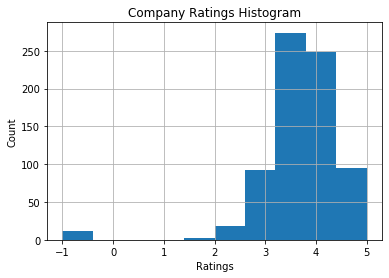

In [267]:
df['Rating'].hist()
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title("Company Ratings Histogram")

Text(0.5, 1.0, 'Companies Age Histogram')

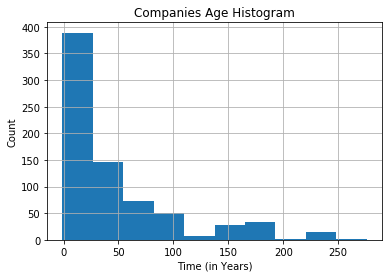

In [268]:
df['company_age'].hist()
plt.xlabel('Time (in Years)')
plt.ylabel('Count')
plt.title("Companies Age Histogram")

Text(0.5, 1.0, 'Average Salary Histogram')

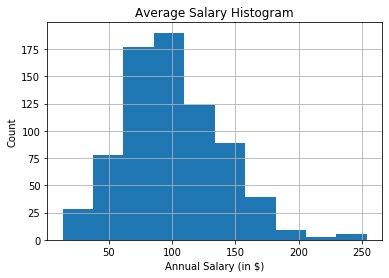

In [269]:
df['average_salary'].hist()
plt.xlabel('Annual Salary (in $)')
plt.ylabel('Count')
plt.title("Average Salary Histogram")

# Exploring categorical data


In [270]:
pd.pivot_table(df, index=['job_title_simplified','job_seniority'], values='average_salary')

average_salary
job_title_simplified job_seniority                
analyst              jr                  56.500000
                     na                  61.155405
                     senior              79.092593
data engineer        na                  96.701220
                     senior             124.689189
data scientist       jr                 106.500000
                     na                 107.043011
                     senior             138.956522
director             na                 168.607143
manager              na                  84.022727
mle                  na                 119.133333
                     senior             142.071429
na                   na                  73.988189
                     senior             109.061404

In [271]:
pd.pivot_table(df, index=['job_state','job_title_simplified'], values='average_salary').sort_values('average_salary', ascending=False)[:20]

,,average_salary
job_state,job_title_simplified,
IL,director,221.750000
CA,mle,177.300000
NJ,director,161.500000
DC,data scientist,149.000000
CA,data scientist,142.522059
UT,data scientist,140.500000
IL,mle,133.000000
CA,data engineer,129.540000
MO,data scientist,127.666667


In [272]:
pd.pivot_table(df, index='job_state', values='average_salary').sort_values('average_salary', ascending=False)[:15]

,average_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


Top 15 Industries for Data Scientists

In [273]:
pd.pivot_table(df, index='Industry', values='average_salary').sort_values('average_salary', ascending=False)[:15]

,average_salary
Industry,
Other Retail Stores,163.500000
Motion Picture Production & Distribution,146.000000
Financial Analytics & Research,145.125000
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000
Auctions & Galleries,128.000000
Internet,123.810345
Investment Banking & Asset Management,118.400000


Top 10 Sectors for Data Scientists

In [274]:
pd.pivot_table(df, index='Sector', values='average_salary').sort_values('average_salary', ascending=False)[:10]

,average_salary
Sector,
Media,116.666667
-1,114.650000
Accounting & Legal,113.500000
Information Technology,113.191667
Biotech & Pharmaceuticals,111.767857
Insurance,105.942029
Real Estate,104.750000
Mining & Metals,104.000000
Telecommunications,102.333333


Top Company types that pay Data Scientists well

In [275]:
pd.pivot_table(df, index='Type of ownership', values='average_salary').sort_values('average_salary', ascending=False)[:10]

,average_salary
Type of ownership,
Public,110.893782
Subsidiary or Business Segment,110.573529
College / University,107.615385
Private,101.776829
Government,84.300000
Other Organization,77.900000
School / School District,77.750000
Nonprofit Organization,68.281818
Hospital,54.000000


Top 20 Companies that pay Data Scientists well

In [276]:
pd.pivot_table(df, index='Company Name', values='average_salary').sort_values('average_salary', ascending=False)[:20]

,average_salary
Company Name,
Gallup,237.5
Sage Intacct,232.5
CA-One Tech Cloud,225.0
Grand Rounds,221.5
Credit Sesame,205.0
The Climate Corporation,194.0
Grainger,179.5
Samsung Research America,177.0
Nektar Therapeutics,174.0


# Feature Engineering

Trimming the 'Industry' column

Taking top 11 Industries and replacing others by 'Others'

In [277]:
industry_list = ['Biotech & Pharmaceuticals', 'Insurance Carriers', 'Computer Hardware & Software', 'IT Services', 'Health Care Services & Hospitals', 
                 'Enterprise Software & Network Solutions', 'Consulting', 'Internet', 'Advertising & Marketing', 'Aerospace & Defense', 'Consumer Products Manufacturing']

def industry_simplifier(text):
  if text not in industry_list:
    return 'Others'
  else:
    return text

df['Industry'] = df['Industry'].apply(industry_simplifier)

Trimming the 'job_state' column

Taking top 10 States and replacing others by 'Others'

In [278]:
job_state_list = ['CA', 'MA', 'NY', 'VA', 'IL', 'MD', 'PA', 'TX', 'NC', 'WA']

def job_state_simplifier(text):
  if text not in job_state_list:
    return 'Others'
  else:
    return text

df['job_state'] = df['job_state'].apply(job_state_simplifier)

Adding column of 'job_in_headquarters'


In [279]:
df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

In [280]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary_per_hour', 'emp_provided_salary', 'min_salary', 'max_salary',
       'average_salary', 'job_state', 'company_age', 'python_job', 'r_job',
       'spark_job', 'aws_job', 'excel_job', 'job_title_simplified',
       'job_seniority', 'job_in_headquarters'],
      dtype='object')

In [281]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,job_state,company_age,python_job,r_job,spark_job,aws_job,excel_job,job_title_simplified,job_seniority,job_in_headquarters
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,Others,47,1,0,0,0,1,data scientist,na,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,MD,36,1,0,0,0,0,data scientist,na,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,Others,10,1,0,1,0,1,data scientist,na,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,WA,55,1,0,0,0,0,data scientist,na,1
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,NY,22,1,0,0,0,1,data scientist,na,1


 Choosing relevant columns

In [282]:
df_model = df.copy(deep=True)
df_model = df_model[['average_salary', 'Rating', 'company_age', 'Size', 'Type of ownership', 'Industry', 'Revenue', 'Competitors',
               'job_title_simplified', 'job_seniority', 'job_state', 'job_in_headquarters', 'python_job', 'spark_job', 'aws_job', 'excel_job', ]]

Renaming columns

In [283]:
df_model.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Type of ownership':'type_of_ownership',
                         'Industry':'industry', 'Revenue':'revenue', 'Competitors':'competitors'}, inplace=True)

In [284]:
df_model.columns

Index(['average_salary', 'company_rating', 'company_age', 'company_size',
       'type_of_ownership', 'industry', 'revenue', 'competitors',
       'job_title_simplified', 'job_seniority', 'job_state',
       'job_in_headquarters', 'python_job', 'spark_job', 'aws_job',
       'excel_job'],
      dtype='object')

# Handling Ordinal Categorical Features

 Mapping ranks to 'company_size' columns since it is ordinal categorical feature

In [285]:
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df_model['company_size_rank'] = df_model['company_size'].map(size_map)
df_model.drop('company_size', axis=True, inplace=True)

Mapping ranks to 'revenue	' columns since it is ordinal categorical feature


In [286]:
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11, '$10+ billion (USD)':12}

df_model['company_revenue_rank'] = df_model['revenue'].map(revenue_map)
df_model.drop('revenue', axis=True, inplace=True)

Mapping ranks to 'job_seniority	' columns since it is ordinal categorical feature


In [287]:
job_seniority_map = {'na': 0, 'jr': 1, 'senior': 2}

df_model['job_seniority_rank'] = df_model['job_seniority'].map(job_seniority_map)
df_model.drop('job_seniority', axis=True, inplace=True)

In [288]:
df_model.columns

Index(['average_salary', 'company_rating', 'company_age', 'type_of_ownership',
       'industry', 'competitors', 'job_title_simplified', 'job_state',
       'job_in_headquarters', 'python_job', 'spark_job', 'aws_job',
       'excel_job', 'company_size_rank', 'company_revenue_rank',
       'job_seniority_rank'],
      dtype='object')

# Handling Nominal Categorical Features

Removing  column using get_dummies()


In [289]:
df_model.shape

(742, 16)

In [290]:
# Removing 'type_of_ownership' column using get_dummies()
df_model = pd.get_dummies(columns=['type_of_ownership'], data=df_model)
df_model.shape

(742, 24)

In [291]:
# Removing 'industry' column using get_dummies()
df_model = pd.get_dummies(columns=['industry'], data=df_model)
df_model.shape

(742, 35)

In [292]:
# Removing 'job_title_simplified' column using get_dummies()
df_model = pd.get_dummies(columns=['job_title_simplified'], data=df_model)
df_model.shape

(742, 41)

In [293]:
# Removing 'job_state' column using get_dummies()
df_model = pd.get_dummies(columns=['job_state'], data=df_model)
df_model.shape

(742, 51)

In [294]:
df_model.head()

,average_salary,company_rating,company_age,competitors,job_in_headquarters,python_job,spark_job,aws_job,excel_job,company_size_rank,...,job_state_IL,job_state_MA,job_state_MD,job_state_NC,job_state_NY,job_state_Others,job_state_PA,job_state_TX,job_state_VA,job_state_WA
0,72.0,3.8,47,0,0,1,0,0,1,4,...,0,0,0,0,0,1,0,0,0,0
1,87.5,3.4,36,0,0,1,0,0,0,7,...,0,0,1,0,0,0,0,0,0,0
2,85.0,4.8,10,0,1,1,1,0,1,4,...,0,0,0,0,0,1,0,0,0,0
3,76.5,3.8,55,3,1,1,0,0,0,5,...,0,0,0,0,0,0,0,0,0,1
4,114.5,2.9,22,3,1,1,0,0,1,2,...,0,0,0,0,1,0,0,0,0,0


# Feature scaling

Dataset after Feature Engineering


In [295]:
X = df_model.drop('average_salary', axis=1)
y = df_model['average_salary']

MinMaxScaler for scaling

In [296]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['company_rating', 'competitors', 'company_age', 'company_size_rank', 'company_revenue_rank']
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

Splitting the dataset into train and test set

In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Training set size: {} and Testing set size: {}".format(X_train.shape, X_test.shape))

Training set size: (593, 50) and Testing set size: (149, 50)


# Model Building

## Linear Regression

## Creating linear regression model

In [298]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

Fitting the dataset to the model

In [299]:
lr_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [300]:
predictions = lr_model.predict(X_test)


In [301]:
predictions

array([120.671875,  68.71875 , 115.421875, 134.359375, 155.921875,
       136.78125 , 140.40625 ,  42.6875  ,  68.359375,  78.328125,
       153.921875,  75.75    , 127.921875, 110.328125,  64.828125,
       131.71875 ,  62.40625 ,  74.828125, 106.265625,  94.359375,
        87.5625  , 111.796875, 154.140625, 113.546875, 139.78125 ,
        97.984375,  72.390625, 140.296875,  99.171875, 102.421875,
        86.734375,  70.84375 , 144.1875  , 105.734375, 101.890625,
       100.265625,  83.421875, 109.359375,  77.71875 , 116.859375,
       165.828125, 119.046875,  99.75    , 107.0625  , 147.625   ,
        96.453125, 144.296875, 115.375   , 142.28125 , 112.953125,
       107.21875 , 105.25    , 106.015625, 105.109375,  79.703125,
       127.0625  ,  99.75    ,  84.859375, 165.828125, 138.0625  ,
       127.140625, 104.40625 , 125.703125, 136.5     , 105.28125 ,
       116.40625 , 101.25    , 133.640625, 137.4375  , 100.8125  ,
       147.625   , 133.640625,  65.109375, 111.875   ,  77.234

In [302]:
y_test

138    100.5
239     48.5
426    154.5
742    122.0
505    162.0
       ...  
77      97.5
273     76.5
152     85.0
46     130.0
78      66.5
Name: average_salary, Length: 149, dtype: float64

## Creating decision tree regression model

In [305]:
from sklearn.tree import DecisionTreeRegressor
decision_model = DecisionTreeRegressor(criterion='mse', max_depth=11, random_state=42)

In [306]:
decision_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [308]:
predictions = decision_model.predict(X_test)
predictions

array([ 85.5       ,  48.5       , 142.05      , 122.        ,
       162.        , 154.5       , 153.5       ,  44.        ,
        47.        ,  88.82352941, 161.5       ,  61.        ,
       102.5       ,  96.2       ,  80.25      , 140.        ,
        60.41666667,  61.5       , 140.        ,  96.65384615,
        95.1       , 108.575     , 150.5       , 118.16666667,
        84.5       , 107.85714286,  61.        , 146.83333333,
       110.        ,  95.7962963 ,  88.82352941,  56.41666667,
       119.78571429,  99.5       , 111.5       ,  79.5       ,
        80.25      , 113.75      ,  62.5       , 121.        ,
       234.16666667, 118.96153846,  96.2       ,  97.45833333,
       173.        ,  69.5       , 140.08333333, 139.5       ,
       129.        , 118.16666667, 107.        ,  88.82352941,
        65.20833333, 114.5       ,  88.82352941, 109.5       ,
        96.2       ,  66.5       , 234.16666667, 119.78571429,
       125.        , 108.575     , 146.        , 146.83

In [309]:
y_test

138    100.5
239     48.5
426    154.5
742    122.0
505    162.0
       ...  
77      97.5
273     76.5
152     85.0
46     130.0
78      66.5
Name: average_salary, Length: 149, dtype: float64

# *Random Forest Regression*


In [314]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42)

In [315]:
forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [316]:
predictions = forest_model.predict(X_test)
predictions

array([104.605     ,  51.075     , 149.99720491, 125.07333333,
       148.12      , 127.33      , 151.03      ,  53.715     ,
        59.885     ,  63.34      , 162.82008333,  66.945     ,
       108.7       , 119.39625   ,  85.64      , 134.83      ,
        63.285     ,  69.52      , 122.23      ,  97.07107143,
       113.88333333, 144.615     , 148.785     , 119.54833333,
       141.44991071, 103.945     ,  71.825     , 150.195     ,
       105.455     ,  98.72      ,  80.57      ,  55.12      ,
       127.75      , 102.90916667, 102.53      ,  90.6       ,
        87.12      , 111.04791667,  67.785     , 117.835     ,
       230.796     , 121.58      ,  91.845     ,  97.13671465,
       158.115     ,  79.675     , 137.07      , 125.        ,
       138.725     , 100.16      , 121.965     ,  81.0825    ,
        76.1625    ,  91.12642857,  88.72      , 120.235     ,
        91.845     ,  69.305     , 230.796     , 138.0075    ,
       114.72166667, 102.765     , 116.23      , 143.01

In [317]:
y_test

138    100.5
239     48.5
426    154.5
742    122.0
505    162.0
       ...  
77      97.5
273     76.5
152     85.0
46     130.0
78      66.5
Name: average_salary, Length: 149, dtype: float64

## Creating AdaBoost regression model

In [310]:
from sklearn.ensemble import AdaBoostRegressor
adb_model = AdaBoostRegressor(base_estimator=decision_model, n_estimators=250, learning_rate=1, random_state=42)

In [311]:
adb_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=11,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=42,
                                                       splitter='best'),
                  l

In [312]:
predictions = adb_model.predict(X_test)
predictions

array([109.64285714,  56.28125   , 149.75      , 122.        ,
       162.        , 130.        , 153.5       ,  51.5       ,
        67.6       ,  62.5       , 161.5       ,  61.        ,
       107.        , 120.        ,  77.5       , 139.83333333,
        63.36      ,  72.5       , 117.38888889,  88.45      ,
       114.5       , 154.5       , 147.        , 120.        ,
       150.5       , 109.        ,  61.        , 146.5       ,
       101.5       ,  97.16176471,  72.5       ,  58.5       ,
       133.        , 100.        , 107.28571429,  86.125     ,
        83.75      , 113.75      ,  73.        , 121.        ,
       224.31481481, 122.5       ,  84.5       ,  95.75      ,
       162.22727273,  81.        , 139.        , 120.5       ,
       128.5       , 100.6       , 120.5       ,  68.5       ,
        79.25      ,  94.92      ,  81.5       , 109.5       ,
        84.5       ,  66.5       , 224.31481481, 111.5       ,
       123.52380952, 103.5       , 108.28571429, 140.  

In [313]:
y_test

138    100.5
239     48.5
426    154.5
742    122.0
505    162.0
       ...  
77      97.5
273     76.5
152     85.0
46     130.0
78      66.5
Name: average_salary, Length: 149, dtype: float64

In [318]:
print("Accuracy of the Linear Regression Model on Training set is : {}% and on Test set is {}%".format(round(lr_model.score(X_train, y_train),4)*100, round(lr_model.score(X_test, y_test),4)*100))
print("Accuracy of the Decision Tree Regression Model on Training set is : {}% and on Test set is {}%".format(round(decision_model.score(X_train, y_train),4)*100, round(decision_model.score(X_test, y_test),4)*100))
print("Accuracy of the Random Forest Regression Model on Training set is : {}% and on Test set is {}%".format(round(forest_model.score(X_train, y_train),4)*100, round(forest_model.score(X_test, y_test),4)*100))
print("Accuracy of the AdaBoost Regression Model on Training set is : {}% and on Test set is {}%".format(round(adb_model.score(X_train, y_train),4)*100, round(adb_model.score(X_test, y_test),4)*100))

Accuracy of the Linear Regression Model on Training set is : 57.879999999999995% and on Test set is 60.72%
Accuracy of the Decision Tree Regression Model on Training set is : 93.17% and on Test set is 75.57000000000001%
Accuracy of the Random Forest Regression Model on Training set is : 95.25% and on Test set is 76.59%
Accuracy of the AdaBoost Regression Model on Training set is : 96.58% and on Test set is 78.62%
